
# Decision Trees - Regression

## Importing libraries

In [7]:
# Data preparing packages
import pandas as pd
import numpy as np

# Graphic packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Modeling packages
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Exploratory Analysis Module
import aed_EN

ModuleNotFoundError: No module named 'pandas'

## Importing database

In [ ]:
df = pd.read_csv('employees_base.csv', 
                 sep=','
                 )
df.head()

,Salary,Years_Under_Grad,Years_at_Company,Career_Time,Has_Data_Skills
0,5517.4,3,3,9.777079,No
1,6399.9,4,6,3.765998,No
2,6206.7,6,3,7.926264,No
3,6060.6,4,5,2.233497,No
4,6122.7,2,9,26.821842,No


## Data Preparing

### Missing Values

In [ ]:
df.isnull().sum()

Salary              0
Years_Under_Grad    0
Years_at_Company    0
Career_Time         0
Has_Data_Skills     0
dtype: int64

### Duplications

In [ ]:
df.duplicated().sum()

0

### Variables Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Salary            46 non-null     float64
 1   Years_Under_Grad  46 non-null     int64  
 2   Years_at_Company  46 non-null     int64  
 3   Career_Time       46 non-null     float64
 4   Has_Data_Skills   46 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB


## Exploratory Data Analysis

### Class Dispersion

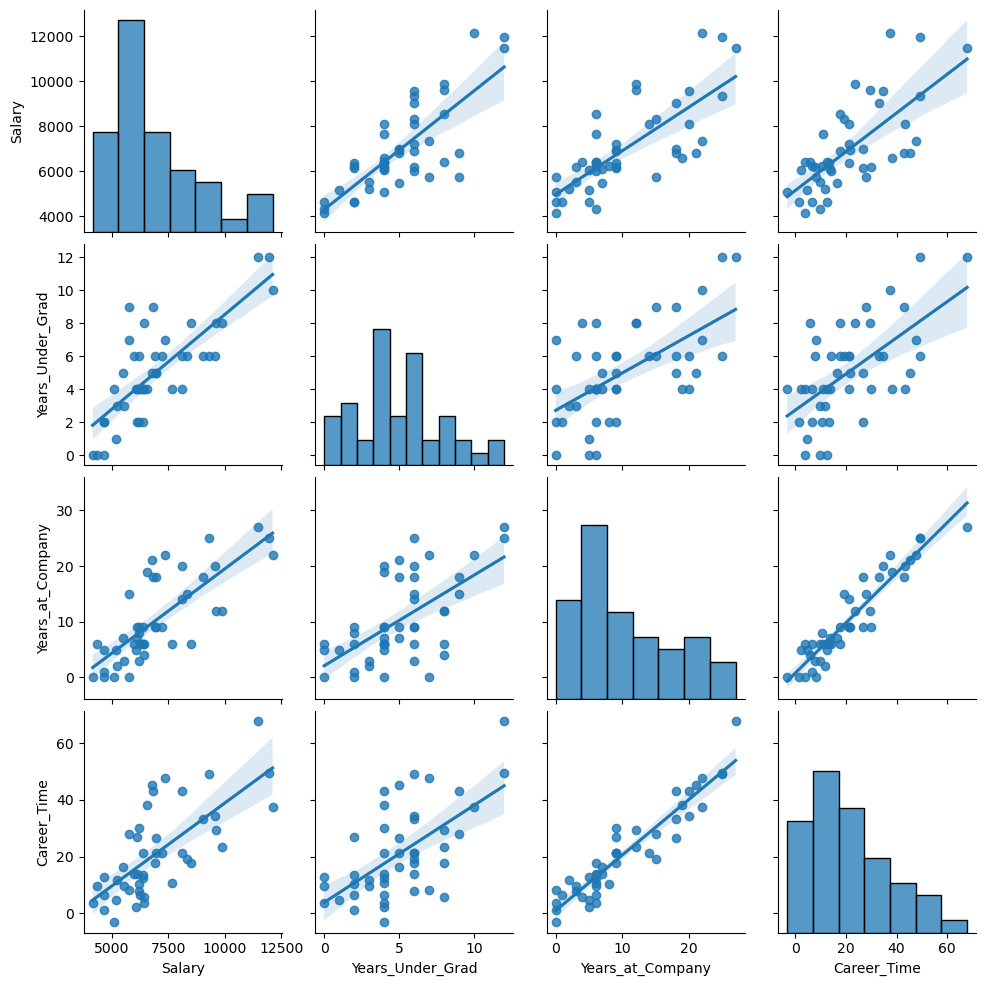

In [ ]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, kind='reg');

### Pandas Profiling and SweetViz Reports

In [ ]:
perfil_pp, perfil_sv = aed_EN.make_reports_aed(df=df,
                                               target_feat='Salary')

c:\Users\rocki\Miniconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 333.17it/s]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Model development: Decision Trees
In this example we will use the Scikit Learn library, one of the most widely used for developing Machine Learning models.

### *Target* and *Features* definition

In [ ]:
# Dummy Variables
df_model = pd.get_dummies(df, dtype=int)
df_model.head()

,Salary,Years_Under_Grad,Years_at_Company,Career_Time,Has_Data_Skills_No,Has_Data_Skills_Yes
0,5517.4,3,3,9.777079,1,0
1,6399.9,4,6,3.765998,1,0
2,6206.7,6,3,7.926264,1,0
3,6060.6,4,5,2.233497,1,0
4,6122.7,2,9,26.821842,1,0


In [ ]:
# Target (response variable)
y = df_model['Salary']

# Features (explanatory variables)
x = df_model.drop('Salary', axis = 1)

### Decision Tree Training

In [ ]:
model_salary = DecisionTreeRegressor(max_depth=2, 
                                       random_state=42)
model_salary.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Trained model evaluation

#### Model Interpretation

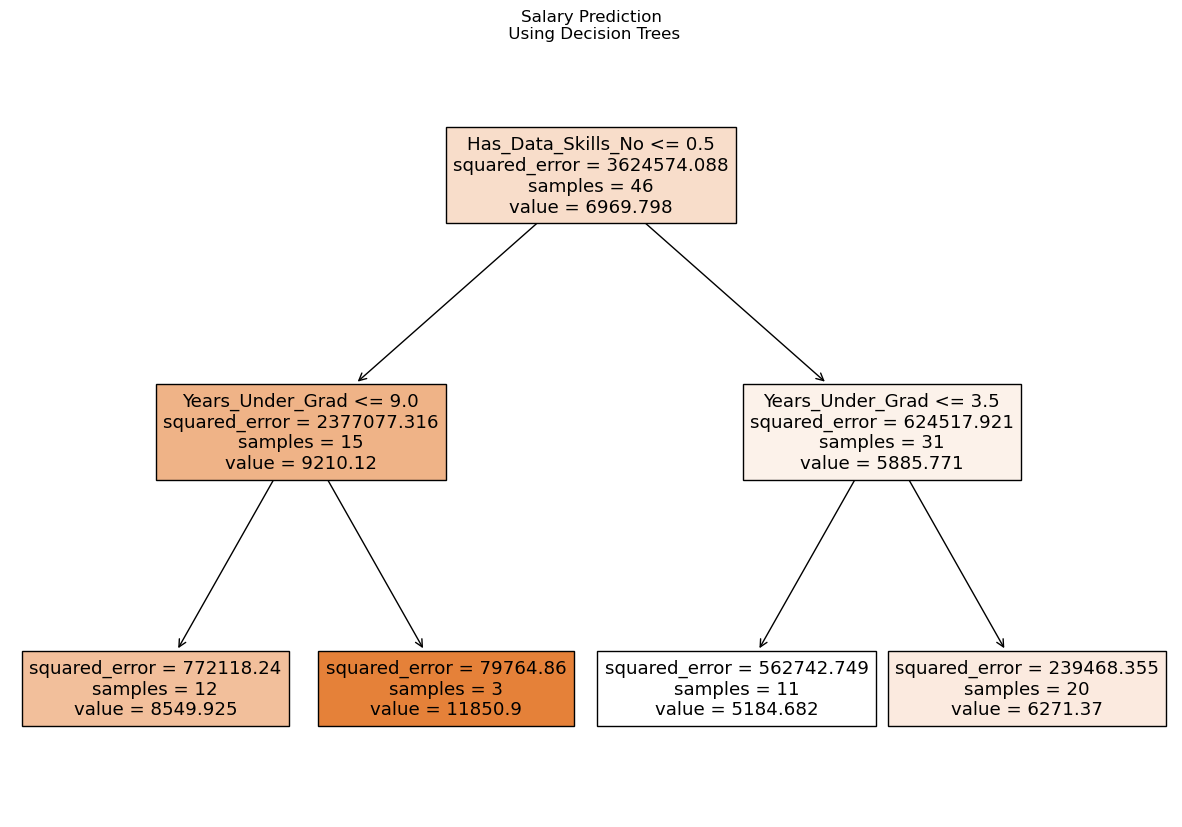

In [ ]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(model_salary,
               feature_names=features,
               filled=True);
plt.title("Salary Prediction\n Using Decision Trees");

c:\Users\rocki\Miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


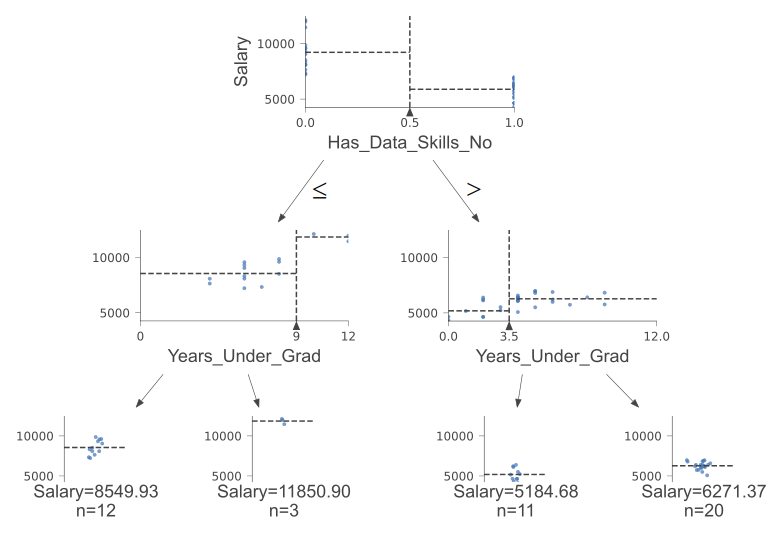

In [ ]:
viz = dtreeviz(tree_model=model_salary, 
               x_data=x, y_data=y, 
               target_name='Salary',
               feature_names=features,
               scale=2.0)
viz

#### Model Performance

In [ ]:
# Calculating the model performance: R²
r2 = r2_score(y, model_salary.predict(x))

n = len(y)
p = x.shape[1]
r2_adjusted = 1 - (1 - r2) * (n - 1)/(n - p - 1)

print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {r2_adjusted:.4f}")

R²: 0.8771
R² Ajustado: 0.8618


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
predictions = model_salary.predict(X_test)

In [ ]:
# Calculating MAE
mae = mean_absolute_error(Y_test, predictions)
print(f"MAE: {mae}")

# Calculating MSE
mse = mean_squared_error(Y_test, predictions)
print(f"MSE: {mse}")

# Calculating RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calculating MAPE
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100
print(f"MAPE: {mape}")

MAE: 554.4632467532475
MSE: 453022.9350110987
RMSE: 673.0697846517096
MAPE: 9.117093301301244
